<a href="https://colab.research.google.com/github/samarth0174/pytorch_mnist/blob/master/pytorchbasic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch

In [0]:
def activation(x):
  return 1/(1+torch.exp(-x))

In [8]:
#Single layer
torch.manual_seed(7)
features = torch.randn((1,5))
w = torch.randn_like(features)
bias = torch.randn((1,1))
w1 = w.view(5,1)
ans = activation((torch.mm(features,w1) + bias))
print(ans)

tensor([[0.1595]])


In [0]:
torch.manual_seed(7)
features = torch.randn((1,3))
n_inp = features.shape[1]
n_hidden  =2
n_out = 1
w1 = torch.randn(n_inp,n_hidden)
w2 = torch.randn(n_hidden,n_out)
b1 = torch.randn((1,n_hidden))
b2 = torch.randn((1,n_out))


In [0]:
#network 
h1 = activation(torch.mm(features,w1) + b1)


In [0]:
o = activation(torch.mm(h1,w2) + b2)

In [36]:
print(o)

tensor([[0.3171]])


In [0]:
#Numpy to torch and back : memory shared b/w torch and numpy
import numpy as np
a= np.random.rand(4,3)
b=torch.from_numpy(a)


In [38]:
b.numpy()

array([[0.7982901 , 0.57340042, 0.60875387],
       [0.23197062, 0.35523658, 0.33069194],
       [0.8605128 , 0.6457858 , 0.69552708],
       [0.92913313, 0.69553931, 0.79033088]])

In [40]:
b.mul_(2) #multiply by 2

tensor([[3.1932, 2.2936, 2.4350],
        [0.9279, 1.4209, 1.3228],
        [3.4421, 2.5831, 2.7821],
        [3.7165, 2.7822, 3.1613]], dtype=torch.float64)

Multilayer Neural Network - mnist

In [0]:
import numpy as np
import torch 
import helper
import matplotlib.pyplot as plt

In [2]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw
Processing...



Done!


In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


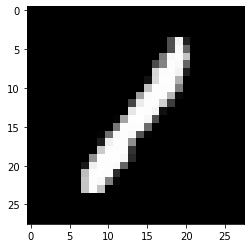

In [4]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [0]:
def activation(x):
  return 1/(1+torch.exp(-x))

In [0]:
torch.manual_seed(7)
inp = images.view(images.shape[0],-1)
n_inp = inp.shape[1]
n_hidden  =256
n_out = 10
w1 = torch.randn(n_inp,n_hidden)
w2 = torch.randn(n_hidden,n_out)
b1 = torch.randn((1,n_hidden))
b2 = torch.randn((1,n_out))


In [0]:
#network 
h1 = activation(torch.mm(inp,w1) + b1)
o1 = (torch.mm(h1,w2) + b2)
 


In [27]:
o1.shape

torch.Size([64, 10])

In [0]:
print(o1)

In [32]:
def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

probabilities = softmax(o1)
print(probabilities.sum())

tensor(64.)


## Building networks with PyTorch

In [0]:
from torch import nn

In [0]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [42]:
# Create the network and look at it's text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

##Functional approach

In [0]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden= nn.Linear(784, 128)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(64, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden1(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [50]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [0]:
#Larger Network
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden1 = nn.Linear(784, 128)
        # Output layer, 10 units - one for each digit
        self.hidden2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        
        # Output layer with softmax activation
        
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [54]:
model = Network()
model

Network(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

### Initializing weights and biases


In [55]:
print(model.hidden1.weight)
print(model.hidden1.bias)

Parameter containing:
tensor([[-0.0312, -0.0017,  0.0230,  ...,  0.0104, -0.0170, -0.0019],
        [-0.0059, -0.0275,  0.0225,  ...,  0.0187, -0.0305,  0.0250],
        [-0.0303, -0.0342,  0.0092,  ...,  0.0081, -0.0017, -0.0052],
        ...,
        [-0.0237, -0.0085, -0.0060,  ...,  0.0180,  0.0049,  0.0097],
        [ 0.0131,  0.0209, -0.0255,  ...,  0.0221, -0.0161,  0.0243],
        [-0.0321, -0.0048, -0.0250,  ...,  0.0045, -0.0319, -0.0029]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0276,  0.0116, -0.0325,  0.0082, -0.0099,  0.0157, -0.0334, -0.0168,
         0.0299, -0.0217, -0.0216,  0.0335, -0.0270, -0.0257, -0.0044,  0.0045,
        -0.0277,  0.0180, -0.0137, -0.0343, -0.0293,  0.0324, -0.0329, -0.0003,
        -0.0249, -0.0015, -0.0035,  0.0245,  0.0146,  0.0308,  0.0240, -0.0072,
         0.0124, -0.0074, -0.0176, -0.0028,  0.0017,  0.0033,  0.0015, -0.0205,
        -0.0280, -0.0078, -0.0134,  0.0353,  0.0230,  0.0350,  0.0298,  0.0300,
        -0.0294

## Understanding what's happening with this forward pass

In [57]:
#using custom helper script from course to visualise
!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py

--2020-04-19 13:56:58--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2020-04-19 13:56:58 (32.8 MB/s) - ‘helper.py’ saved [2813/2813]



In [60]:
import importlib
importlib.reload(helper)

<module 'helper' from '/content/helper.py'>

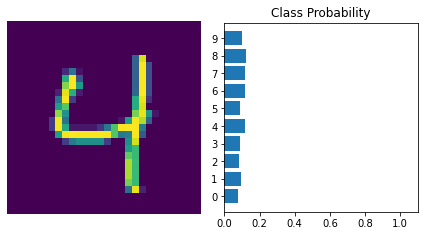

In [61]:

# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)
#basically model has no idea what number surely it is therefore giving equal weightage to each class /softmax distribution

# Convinient -  nn.Sequential

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


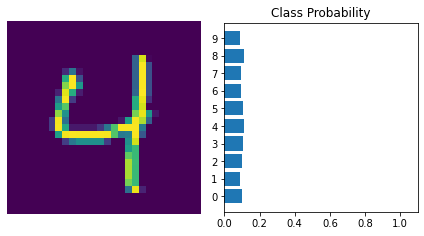

In [65]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model  = nn.Sequential(nn.Linear(input_size,hidden_sizes[0]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[0],hidden_sizes[1]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[1],output_size),
                       nn.Softmax(dim=1))

print(model)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

In [66]:
#Using Dict
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

##LOSSES IN PYTORCH

In [0]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
criterion  = nn.NLLLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
pred = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(pred, labels)

In [72]:

print(loss)

tensor(2.3164, grad_fn=<NllLossBackward>)


## Autograd

In [0]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logits = model(images)
loss = criterion(logits, labels)

In [74]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-4.1448e-03, -4.1448e-03, -4.1448e-03,  ..., -4.1448e-03,
         -4.1448e-03, -4.1448e-03],
        [-6.7320e-05, -6.7320e-05, -6.7320e-05,  ..., -6.7320e-05,
         -6.7320e-05, -6.7320e-05],
        [-1.8229e-03, -1.8229e-03, -1.8229e-03,  ..., -1.8229e-03,
         -1.8229e-03, -1.8229e-03],
        ...,
        [-6.3641e-03, -6.3641e-03, -6.3641e-03,  ..., -6.3641e-03,
         -6.3641e-03, -6.3641e-03],
        [ 3.1042e-04,  3.1042e-04,  3.1042e-04,  ...,  3.1042e-04,
          3.1042e-04,  3.1042e-04],
        [ 4.8489e-03,  4.8489e-03,  4.8489e-03,  ...,  4.8489e-03,
          4.8489e-03,  4.8489e-03]])


#Training

In [0]:
#using optimsers for training 
from torch import optim
optimizer = optim.SGD(model.parameters(),lr=0.01)


In [78]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated ##imp
optimizer.zero_grad()


# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
#backprop
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0182, -0.0016, -0.0017,  ..., -0.0125, -0.0027,  0.0042],
        [ 0.0318,  0.0213,  0.0204,  ...,  0.0279,  0.0114, -0.0042],
        [-0.0327,  0.0177, -0.0189,  ..., -0.0107, -0.0335,  0.0243],
        ...,
        [-0.0271, -0.0219,  0.0164,  ...,  0.0342,  0.0164, -0.0258],
        [ 0.0136, -0.0324, -0.0344,  ...,  0.0052,  0.0279,  0.0126],
        [-0.0018,  0.0110, -0.0153,  ...,  0.0038, -0.0115,  0.0109]],
       requires_grad=True)
Gradient - tensor([[ 0.0008,  0.0008,  0.0008,  ...,  0.0008,  0.0008,  0.0008],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [-0.0015, -0.0015, -0.0015,  ..., -0.0015, -0.0015, -0.0015],
        ...,
        [-0.0014, -0.0014, -0.0014,  ..., -0.0014, -0.0014, -0.0014],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003]])


In [79]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0182, -0.0016, -0.0017,  ..., -0.0125, -0.0027,  0.0042],
        [ 0.0318,  0.0213,  0.0204,  ...,  0.0279,  0.0114, -0.0042],
        [-0.0326,  0.0177, -0.0189,  ..., -0.0107, -0.0335,  0.0244],
        ...,
        [-0.0271, -0.0219,  0.0164,  ...,  0.0342,  0.0165, -0.0258],
        [ 0.0136, -0.0324, -0.0344,  ...,  0.0052,  0.0279,  0.0126],
        [-0.0018,  0.0110, -0.0153,  ...,  0.0038, -0.0115,  0.0109]],
       requires_grad=True)


##Real time training

In [86]:
## Your solution here

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        # Forward pass, 
        output = model.forward(images)
        loss = criterion(output, labels)
        #then backward pass
        loss.backward()
        #then update weights
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9419964479485046
Training loss: 0.8787049605711691
Training loss: 0.5250336879542642
Training loss: 0.42717350781090985
Training loss: 0.3815393282819404


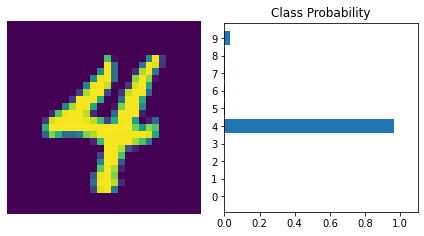

In [87]:
img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)